In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error


In [2]:
!pip install kaggle


In [6]:
df = pd.read_csv("sales.csv")
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')


In [8]:
daily_sales = df.groupby('date')['sales'].sum().reset_index()
daily_sales.head()


,date,sales
0,2013-01-01,2511.618999
1,2013-01-02,496092.417944
2,2013-01-03,361461.231124
3,2013-01-04,354459.677093
4,2013-01-05,477350.121229


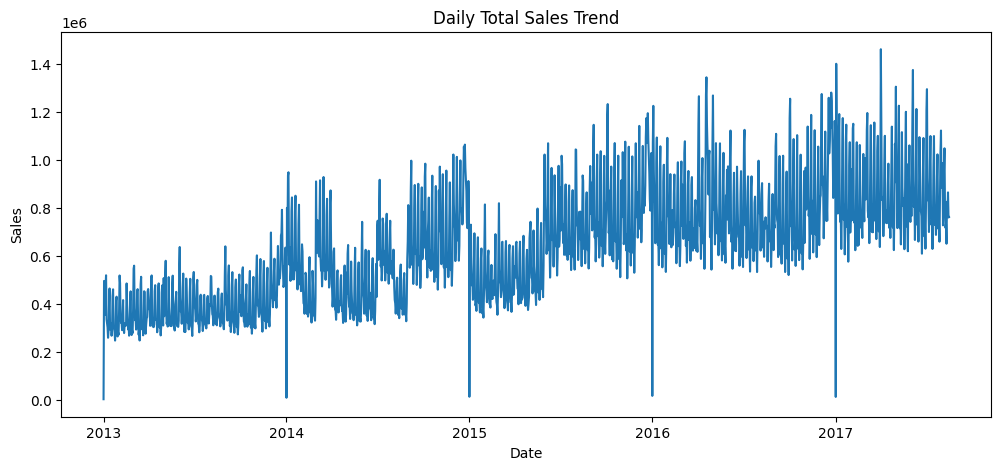

In [9]:
plt.figure(figsize=(12,5))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title("Daily Total Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [10]:
monthly_sales = daily_sales.set_index('date').resample('M').sum()
monthly_sales.head()


/tmp/ipython-input-1482412938.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.set_index('date').resample('M').sum()


,sales
date,
2013-01-31,1.032762e+07
2013-02-28,9.658960e+06
2013-03-31,1.142850e+07
2013-04-30,1.099346e+07
2013-05-31,1.159770e+07


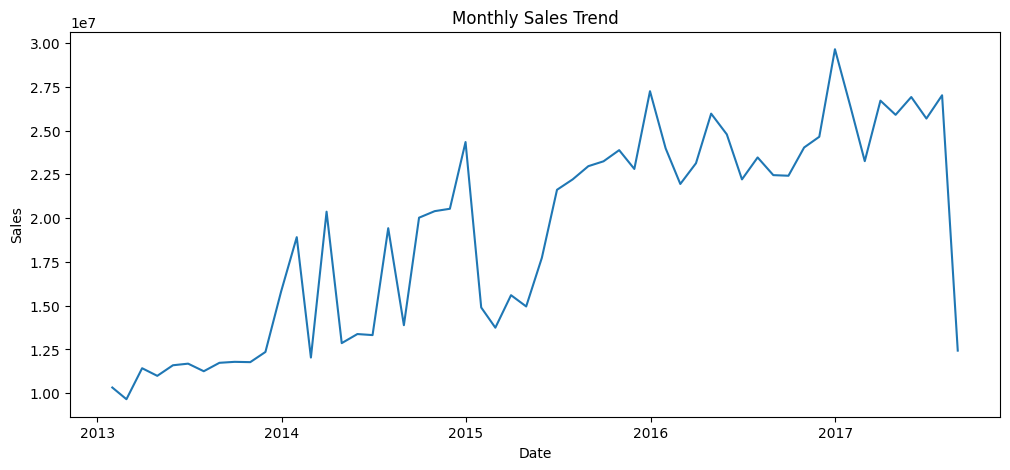

In [11]:
plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index, monthly_sales['sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [12]:
train = monthly_sales.iloc[:-3]
test = monthly_sales.iloc[-3:]


In [13]:
model = ExponentialSmoothing(train['sales'], trend='add', seasonal=None)
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)


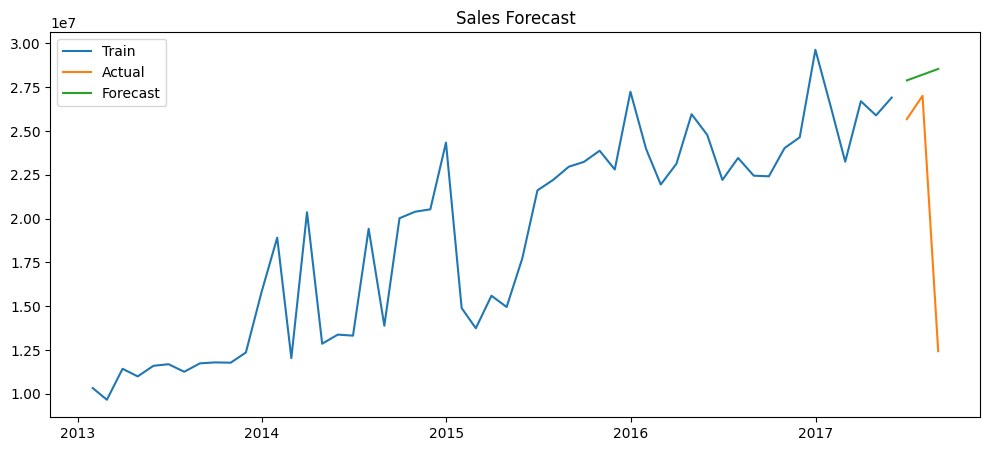

In [14]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train['sales'], label='Train')
plt.plot(test.index, test['sales'], label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("Sales Forecast")
plt.show()


In [15]:
mae = mean_absolute_error(test['sales'], forecast)

mape = np.mean(np.abs((test['sales'] - forecast) / test['sales'])) * 100

print("MAE:", mae)
print("MAPE:", mape)


MAE: 6509370.954892628
MAPE: 47.55310844709444


In [16]:
forecast_df = pd.DataFrame({
    'Date': test.index,
    'Actual_Sales': test['sales'].values,
    'Forecast_Sales': forecast.values
})

forecast_df.to_csv("forecast_output.csv", index=False)
